### 1. 决策树 
- Decision Tree
- 自身就是很好的算法！！！
- 解释性比较强！！！
- 还能对特征重要性排序！！！
- 它可大可小！！！
- 它是集成学习的基础！！！
- 决策树的方式是群狼战术，即用一堆低级的算法来解决问题
- CART(Classification and Regression Tree)：分类和回归树
- 训练：
  - 构建一棵决策树
- 推理：
  - 利用决策条件来做推理！

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

In [2]:
X, y = load_iris(return_X_y=True)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [4]:
dtc = DecisionTreeClassifier()

In [5]:
dtc.fit(X=X_train, y=y_train)

DecisionTreeClassifier()

[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.665\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.46153846153846156, 0.8333333333333333, 'True  '),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.496\nsamples = 81\nvalue = [0, 37, 44]'),
 Text(0.5384615384615384, 0.8333333333333333, '  False'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.18\nsamples = 40\nvalue = [0, 36, 4]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.5384615384615384, 0.25, 'x

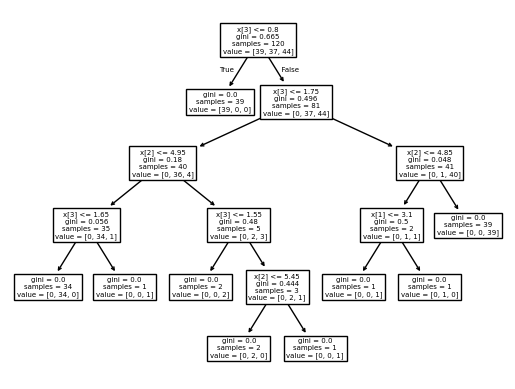

In [6]:
plot_tree(dtc)

- 决策树中的几个概念：
    - root：跟节点，即最上面的
    - leaf：没法继续往下分的，每个叶子结点包含三个类别，但其中只有一种是有数量的 如：`value = [0, 34, 0]`
    - node：可以继续往下分的
- 上面这个决策树，共计分了 5 次

In [7]:
# 减枝，就是对决策树的分裂次数做限制
# entropy翻译叫熵， 即 混乱程度
dtc = DecisionTreeClassifier(max_depth=2, criterion="entropy")

In [8]:
dtc.fit(X=X_train, y=y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [9]:
# 特征重要性
dtc.feature_importances_

array([0.        , 0.        , 0.66489397, 0.33510603])

[Text(0.4, 0.8333333333333334, 'x[2] <= 2.35\nentropy = 1.581\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[3] <= 1.75\nentropy = 0.995\nsamples = 81\nvalue = [0, 37, 44]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.469\nsamples = 40\nvalue = [0, 36, 4]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.165\nsamples = 41\nvalue = [0, 1, 40]')]

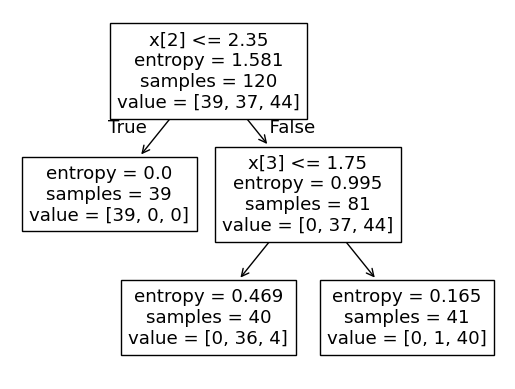

In [10]:
plot_tree(dtc)

看上面的已经被剪枝的叔可以看出，`根据投票法则`最下面左边的node最终归类为`第二类`，右边的node最终归类为`第三类`

In [11]:
X_train.shape

(120, 4)

In [12]:
"""
    通过枚举遍历寻找最优分裂点
"""
for feature_idx in range(4):
    print(feature_idx)
    for feature_value in set(X_train[:, feature_idx]):
        y_left = y_train[X_train[:, 0] <= feature_value]
        y_right = y_train[X_train[:, 0] > feature_value]
        print(y_left,y_right)
        print("-" * 100)
    break

0
[0 0 0 0 0 0 0 0 0] [2 1 0 2 2 1 0 1 1 1 2 2 0 0 1 2 2 2 2 1 2 1 1 2 2 2 2 1 2 1 0 2 1 1 1 1 2
 0 2 1 0 0 1 2 1 1 2 1 0 2 2 2 2 0 0 2 2 2 0 2 2 0 2 0 0 1 2 2 0 0 0 1 1 0
 0 1 0 2 1 2 1 0 2 0 2 0 2 0 2 1 1 1 2 2 1 1 0 1 2 2 0 1 1 1 1 0 0 0 2 1 2]
----------------------------------------------------------------------------------------------------
[1 0 1 0 0 0 1 1 2 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 0] [2 2 2 0 1 1 1 2 2 2 2 2 2 1 2 1 2 2 2 1 2 1 2 1 1 1 2 2 1 0 1 2 1 2 1 2 2
 2 2 2 2 2 2 2 2 2 2 1 1 1 2 2 1 2 0 2 2 2 1 1 1 2 2 1 1 2 2 1 1 1 1 2 1 2]
----------------------------------------------------------------------------------------------------
[1 0 2 1 0 1 1 1 0 0 0 1 2 1 1 1 2 2 2 2 1 0 2 1 1 1 1 0 0 1 0 0 0 2 1 0 1
 1 0 0 0 0 2 0 2 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 2 0 0 0 0 2 1 1 1 1 0 1 2 0
 1 1 1 0 0 0 2 1 0] [2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 1 2 2 2 2 1 2 1 2]
----------------------------------------------------------

### 熵 entroy
- 香农
- 混乱程度
- 不纯度 impurity
- 不确定性
- 拿不准
- 系统越混乱，熵就越大！！！
- 对于分类问题：
  - 类别越多，每个类别的概率越均等，熵越大！
  - 信息熵
  - 基尼系数 gini：gini是熵的工程系数，并没有什么实际意义
- 对于回归问题：
  - 数据越集中，熵越小，数据越分散，熵越大！
  - 方差：就是知道数据是否集中
- 香农观点：
  - 一个模型，在没有训练时，混乱程度是最高的！
  - 随着训练的进行，混乱程度逐渐降低！
  - 所以，模型训练的过程，就是系统熵在不断下降的过程！
  - 好的算法，就是让熵下降的很快！！

In [13]:
import numpy as np

In [14]:
p1 = np.array([0.5, 0.5])

In [15]:
entropy_p1 = 0.5 * np.log2(1/0.5) + 0.5 * np.log2(1 / 0.5)

In [16]:
entropy_p1

np.float64(1.0)

In [17]:
p2 = np.array([0.9, 0.1])

In [18]:
entropy_p2 = 0.9 * np.log2(1 / 0.9) + 0.1 * np.log2(1 / 0.1)

In [19]:
entropy_p2

np.float64(0.46899559358928133)

In [20]:
# 也可以这么写
(p2 * np.log2(1 / p2)).sum()

np.float64(0.46899559358928133)

In [21]:
num = np.array([39, 37, 44])

In [22]:
p = num / num.sum()

In [23]:
p

array([0.325     , 0.30833333, 0.36666667])

In [24]:
1 / p

array([3.07692308, 3.24324324, 2.72727273])

In [25]:
(p * np.log2(1 / p)).sum()

np.float64(1.5810951599090193)